In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
pip install PyWavelets==0.5.2


  Using cached PyWavelets-0.5.2.tar.gz (4.4 MB)
  ERROR: Command errored out with exit status 1:
   command: /Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/3c/qcq9866d0_n9g2rwv6p42xw00000gn/T/pip-install-nidn7_f9/pywavelets_1afc43fa64bf41908da6ee176a8074d7/setup.py'"'"'; __file__='"'"'/private/var/folders/3c/qcq9866d0_n9g2rwv6p42xw00000gn/T/pip-install-nidn7_f9/pywavelets_1afc43fa64bf41908da6ee176a8074d7/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /private/var/folders/3c/qcq9866d0_n9g2rwv6p42xw00000gn/T/pip-wheel-vun8yhhh
       cwd: /private/var/folders/3c/qcq9866d0_n9g2rwv6p42xw00000gn/T/pip-install-nidn7_f9/pywavelets_1afc43fa64bf41908da6ee1

In [7]:
pip install opencv-python==3.4.3.18


ERROR: Could not find a version that satisfies the requirement opencv-python==3.4.3.18 (from versions: 3.4.0.14, 3.4.10.37, 3.4.11.39, 3.4.11.41, 3.4.11.43, 3.4.11.45, 3.4.13.47, 3.4.14.51, 3.4.14.53, 3.4.15.55, 3.4.16.57, 3.4.16.59, 3.4.17.61, 3.4.17.63, 3.4.18.65, 4.3.0.38, 4.4.0.40, 4.4.0.42, 4.4.0.44, 4.4.0.46, 4.5.1.48, 4.5.2.52, 4.5.2.54, 4.5.3.56, 4.5.4.58, 4.5.4.60, 4.5.5.62, 4.5.5.64, 4.6.0.66, 4.7.0.68, 4.7.0.72, 4.8.0.74)
ERROR: No matching distribution found for opencv-python==3.4.3.18
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install seaborn==0.8.1

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [9]:
img = cv2.imread('/Users/yashkumar/Desktop/face_detection/model/test images/pepper.jpg')
img.shape

(300, 400, 3)

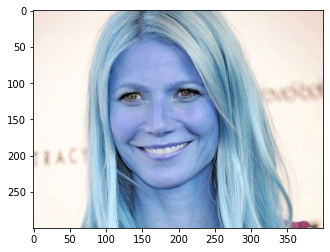

In [10]:
plt.imshow(img)

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(300, 400)

In [12]:
gray

array([[223, 223, 223, ..., 214, 214, 213],
       [223, 223, 224, ..., 214, 214, 214],
       [224, 224, 224, ..., 214, 214, 214],
       ...,
       [246, 246, 246, ..., 229, 237, 239],
       [246, 246, 246, ..., 229, 237, 239],
       [246, 246, 246, ..., 228, 237, 239]], dtype=uint8)

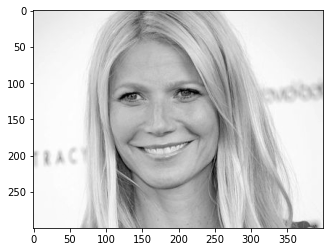

In [13]:
plt.imshow(gray, cmap='gray')

In [14]:
face_cascade = cv2.CascadeClassifier('/Users/yashkumar/Desktop/face_detection/model/openCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('/Users/yashkumar/Desktop/face_detection/model/openCV/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 75,  47, 190, 190]], dtype=int32)

In [15]:
(x,y,w,h) = faces[0]
x,y,w,h

(75, 47, 190, 190)

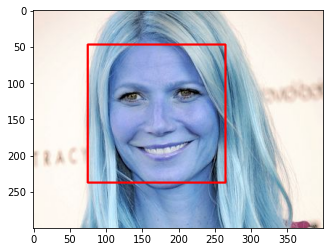

In [16]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

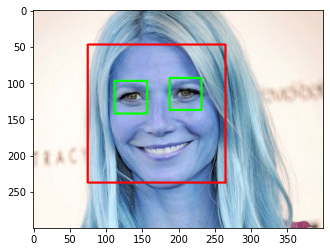

In [17]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

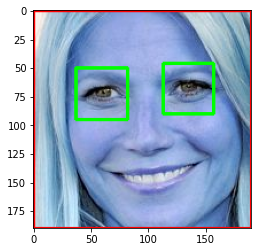

In [18]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [19]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Unable to read the image file at {image_path}")
        return None

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

    return None


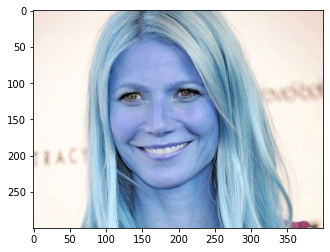

In [20]:
original_image = cv2.imread('/Users/yashkumar/Desktop/face_detection/model/test images/pepper.jpg')
plt.imshow(original_image)

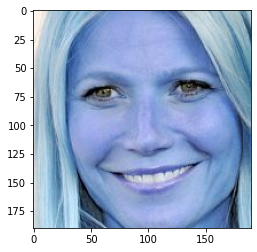

In [21]:
cropped_image = get_cropped_image_if_2_eyes('/Users/yashkumar/Desktop/face_detection/model/test images/pepper.jpg')
plt.imshow(cropped_image)

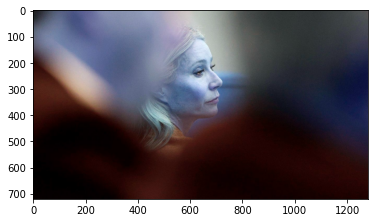

In [22]:
org_image_obstructed = cv2.imread('/Users/yashkumar/Desktop/face_detection/model/test images/blur.jpg')
plt.imshow(org_image_obstructed)

In [23]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('/Users/yashkumar/Desktop/face_detection/model/test images/blur.jpg')
cropped_image_no_2_eyes

In [24]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [25]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
img_dirs

['./dataset/elizabeth_olsen ',
 './dataset/Karen Gillan ',
 './dataset/scarlett_johansson ',
 './dataset/Gwyneth Paltrow ',
 './dataset/Cobie Smulders ',
 './dataset/Zendaya ',
 './dataset/Emily_VanCamp ',
 './dataset/Natalie Portman ',
 './dataset/cropped',
 './dataset/Brie Larson ',
 './dataset/iman vellani ']

In [27]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [28]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

elizabeth_olsen 
Generating cropped images in folder:  ./dataset/cropped/elizabeth_olsen 
Error: Unable to read the image file at ./dataset/elizabeth_olsen /com_lookaside_crawler_media_.html
Karen Gillan 
Generating cropped images in folder:  ./dataset/cropped/Karen Gillan 
Error: Unable to read the image file at ./dataset/Karen Gillan /com_seo_google_widget_crawler_ (2).html
Error: Unable to read the image file at ./dataset/Karen Gillan /com_seo_google_widget_crawler_.html
Error: Unable to read the image file at ./dataset/Karen Gillan /com_seo_google_widget_crawler_ (6).html
Error: Unable to read the image file at ./dataset/Karen Gillan /com_seo_google_widget_crawler_ (4).html
Error: Unable to read the image file at ./dataset/Karen Gillan /com_seo_google_widget_crawler_ (3).html
Error: Unable to read the image file at ./dataset/Karen Gillan /com_seo_google_widget_crawler_ (1).html
Error: Unable to read the image file at ./dataset/Karen Gillan /com_seo_google_widget_crawler_ (5).html
E

Premature end of JPEG file


scarlett_johansson 
Generating cropped images in folder:  ./dataset/cropped/scarlett_johansson 


Premature end of JPEG file
Premature end of JPEG file


Gwyneth Paltrow 
Generating cropped images in folder:  ./dataset/cropped/Gwyneth Paltrow 
Error: Unable to read the image file at ./dataset/Gwyneth Paltrow /com_seo_google_widget_crawler_ (2).html
Error: Unable to read the image file at ./dataset/Gwyneth Paltrow /com_seo_google_widget_crawler_.html
Error: Unable to read the image file at ./dataset/Gwyneth Paltrow /.DS_Store
Error: Unable to read the image file at ./dataset/Gwyneth Paltrow /com_seo_google_widget_crawler_ (4).html
Error: Unable to read the image file at ./dataset/Gwyneth Paltrow /com_seo_google_widget_crawler_ (3).html
Error: Unable to read the image file at ./dataset/Gwyneth Paltrow /com_seo_google_widget_crawler_ (1).html


Premature end of JPEG file


Error: Unable to read the image file at ./dataset/Gwyneth Paltrow /gwyneth-paltrow-6.jpg.crdownload
Error: Unable to read the image file at ./dataset/Gwyneth Paltrow /com_lookaside_crawler_media_.html


Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file
Premature end of JPEG file


Cobie Smulders 
Generating cropped images in folder:  ./dataset/cropped/Cobie Smulders 
Error: Unable to read the image file at ./dataset/Cobie Smulders /com_seo_google_widget_crawler_ (2).html
Error: Unable to read the image file at ./dataset/Cobie Smulders /com_seo_google_widget_crawler_.html
Error: Unable to read the image file at ./dataset/Cobie Smulders /com_lookaside_crawler_media_ (1).html
Error: Unable to read the image file at ./dataset/Cobie Smulders /com_seo_google_widget_crawler_ (1).html
Error: Unable to read the image file at ./dataset/Cobie Smulders /com_lookaside_crawler_media_.html
Zendaya 
Generating cropped images in folder:  ./dataset/cropped/Zendaya 


Premature end of JPEG file


Emily_VanCamp 
Generating cropped images in folder:  ./dataset/cropped/Emily_VanCamp 
Error: Unable to read the image file at ./dataset/Emily_VanCamp /61293665.gif


Premature end of JPEG file
Premature end of JPEG file


Natalie Portman 
Generating cropped images in folder:  ./dataset/cropped/Natalie Portman 


Corrupt JPEG data: 2 extraneous bytes before marker 0xed


Error: Unable to read the image file at ./dataset/Natalie Portman /com_seo_google_widget_crawler_ (2).html
Error: Unable to read the image file at ./dataset/Natalie Portman /com_seo_google_widget_crawler_.html
Error: Unable to read the image file at ./dataset/Natalie Portman /com_seo_google_widget_crawler_ (1).html
Error: Unable to read the image file at ./dataset/Natalie Portman /com_lookaside_crawler_media_.html


Premature end of JPEG file


Error: Unable to read the image file at ./dataset/Natalie Portman /201210-natalie-portman-jm-1049.jpg.crdownload
cropped
Error: Unable to read the image file at ./dataset/cropped/elizabeth_olsen 
Error: Unable to read the image file at ./dataset/cropped/Karen Gillan 
Error: Unable to read the image file at ./dataset/cropped/scarlett_johansson 
Error: Unable to read the image file at ./dataset/cropped/Gwyneth Paltrow 
Error: Unable to read the image file at ./dataset/cropped/Cobie Smulders 
Error: Unable to read the image file at ./dataset/cropped/Zendaya 
Error: Unable to read the image file at ./dataset/cropped/Emily_VanCamp 
Error: Unable to read the image file at ./dataset/cropped/Natalie Portman 
Brie Larson 
Generating cropped images in folder:  ./dataset/cropped/Brie Larson 
Error: Unable to read the image file at ./dataset/Brie Larson /com_seo_google_widget_crawler_ (2).html
Error: Unable to read the image file at ./dataset/Brie Larson /com_seo_google_widget_crawler_.html
Error:

Premature end of JPEG file
Premature end of JPEG file


Error: Unable to read the image file at ./dataset/iman vellani /ms-marvel-shah-rukh-khan-.jpg.crdownload
Error: Unable to read the image file at ./dataset/iman vellani /com_lookaside_crawler_media_.html


Premature end of JPEG file
Premature end of JPEG file


Error: Unable to read the image file at ./dataset/iman vellani /iman-vellani-adorable.gif


In [29]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

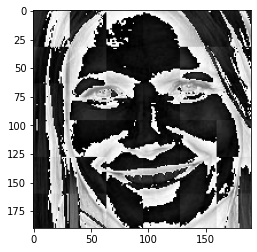

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')


In [31]:
celebrity_file_names_dict

{'elizabeth_olsen ': ['./dataset/cropped/elizabeth_olsen /elizabeth_olsen 1.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 2.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 3.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 4.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 5.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 6.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 7.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 8.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 9.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 10.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 11.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 12.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 13.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 14.png',
  './dataset/cropped/elizabeth_olsen /elizabeth_olsen 15.png',
  './dataset/cropped/elizabeth_olsen /elizab

In [32]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'elizabeth_olsen ': 0,
 'Karen Gillan ': 1,
 'scarlett_johansson ': 2,
 'Gwyneth Paltrow ': 3,
 'Cobie Smulders ': 4,
 'Zendaya ': 5,
 'Emily_VanCamp ': 6,
 'Natalie Portman ': 7,
 'cropped': 8,
 'Brie Larson ': 9,
 'iman vellani ': 10}

In [33]:
X = []
y = []
for celebrity_name , training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har = w2d(img , 'db1' , 5)
        scalled_raw_har = cv2.resize(img , (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [34]:
len(X[0])

3072

In [35]:
X[0]

array([[ 18],
       [ 21],
       [ 26],
       ...,
       [207],
       [191],
       [174]], dtype=uint8)

In [37]:
X = np.array(X).reshape(len(X), 3072).astype(float)
X.shape

(795, 3072)

In [38]:
X[0]

array([ 18.,  21.,  26., ..., 207., 191., 174.])

In [54]:
pip install sklearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [39]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6180904522613065

In [41]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.39      0.35      0.37        26
           1       0.48      0.83      0.61        12
           2       0.54      0.52      0.53        25
           3       0.82      0.53      0.64        17
           4       0.65      0.65      0.65        20
           5       0.70      0.95      0.81        22
           6       0.72      0.65      0.68        20
           7       0.75      0.60      0.67        20
           9       0.55      0.65      0.59        17
          10       0.75      0.60      0.67        20

    accuracy                           0.62       199
   macro avg       0.63      0.63      0.62       199
weighted avg       0.63      0.62      0.61       199



In [42]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [43]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}


In [44]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df


,model,best_score,best_params
0,svm,0.585588,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.315448,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.634202,{'logisticregression__C': 1}


In [45]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [46]:
best_estimators['svm'].score(X_test,y_test)

0.5979899497487438

In [ ]:
best_estimators['random_forest'].score(X_test,y_test)

0.3387096774193548

In [47]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.628140703517588

In [48]:
best_clf = best_estimators['svm']

In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm


array([[10,  1,  6,  0,  0,  1,  3,  1,  2,  2],
       [ 1,  9,  0,  0,  0,  0,  0,  1,  0,  1],
       [ 3,  0, 15,  2,  1,  1,  1,  0,  1,  1],
       [ 1,  0,  1, 11,  0,  0,  1,  1,  2,  0],
       [ 0,  1,  1,  0, 13,  4,  0,  0,  0,  1],
       [ 1,  1,  1,  0,  0, 16,  1,  0,  0,  2],
       [ 0,  1,  1,  0,  0,  0, 16,  0,  1,  1],
       [ 0,  3,  2,  0,  1,  1,  1,  9,  2,  1],
       [ 1,  0,  2,  1,  0,  0,  1,  1, 11,  0],
       [ 2,  0,  0,  0,  2,  7,  0,  0,  0,  9]])

Text(69.0, 0.5, 'Truth')

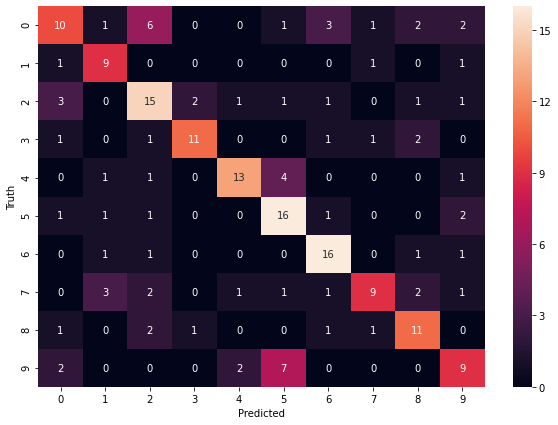

In [50]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
class_dict

{'elizabeth_olsen ': 0,
 'Karen Gillan ': 1,
 'scarlett_johansson ': 2,
 'Gwyneth Paltrow ': 3,
 'Cobie Smulders ': 4,
 'Zendaya ': 5,
 'Emily_VanCamp ': 6,
 'Natalie Portman ': 7,
 'cropped': 8,
 'Brie Larson ': 9,
 'iman vellani ': 10}

In [52]:
%pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


['saved_model.pkl']

In [53]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [1]:
def get_b64_test_image_for_pepper():
    with open("/Users/yashkumar/Desktop/face_detection/server/base64.txt") as f:
        return f.read()


In [17]:
pip install PyWavelets


You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [31]:
import joblib
import json
import numpy as np
import base64
import cv2
import pywt 


In [32]:
__model = None

In [33]:
def classify_image(image_base64_data, file_path=None):

    imgs = get_cropped_image_if_2_eyes(file_path, image_base64_data)

    result = []
    for img in imgs:
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = pywt(img, 'db1', 5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32 * 32 * 3, 1), scalled_img_har.reshape(32 * 32, 1)))

        len_image_array = 32*32*3 + 32 * 32

        final = combined_img.reshape(1,len_image_array).astype(float)
        result.append({
            'class': class_number_to_name(__model.predict(final)[0]),
            'class_probability': np.around(__model.predict_proba(final)*100,2).tolist()[0],
            'class_dictionary': __class_name_to_number
        })

    return result

In [34]:
def class_number_to_name(class_num):
    return __class_number_to_name[class_num]

In [35]:
def load_saved_artifacts():
    print("loading saved artifacts...start")
    global __class_name_to_number
    global __class_number_to_name

    with open("/Users/yashkumar/Desktop/face_detection/server/artifacts/class_dictionary.json", "r") as f:
        __class_name_to_number = json.load(f)
        __class_number_to_name = {v:k for k,v in __class_name_to_number.items()}

    global __model
    if __model is None:
        with open('/Users/yashkumar/Desktop/face_detection/server/artifacts/saved_model.pkl', 'rb') as f:
            __model = joblib.load(f)
    print("loading saved artifacts...done")

In [36]:
def get_cv2_image_from_base64_string(b64str):
    

    encoded_data = b64str.split(',')[1]
    nparr = np.frombuffer(base64.b64decode(encoded_data), np.uint8)
    img = cv2.imdecode(nparr, cv2.IMREAD_COLOR)
    return img

In [37]:
def get_cropped_image_if_2_eyes(image_path, image_base64_data):
    face_cascade = cv2.CascadeClassifier('/Users/yashkumar/Desktop/face_detection/server/openCV/haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('/Users/yashkumar/Desktop/face_detection/server/openCV/haarcascade_eye.xml')

    if image_path:
        img = cv2.imread(image_path)
    else:
        img = get_cv2_image_from_base64_string(image_base64_data)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    cropped_faces = []
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            cropped_img = cv2.resize(roi_color, (32, 32))  # Resize the image to (32, 32)
            cropped_faces.append(cropped_img)
    return cropped_faces


In [38]:
def get_b64_test_image_for_pepper():
    with open("/Users/yashkumar/Desktop/face_detection/server/base64.txt") as f:
        return f.read()



In [39]:
if __name__ == '__main__':
    load_saved_artifacts()
    result = classify_image(get_b64_test_image_for_pepper(), None)
    print(result)

loading saved artifacts...start
loading saved artifacts...done


TypeError: 'module' object is not callable